### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
import cv2
import math
import random
from math import cos, sin
import joblib
import mediapipe as mp

objc[14767]: Class CaptureDelegate is implemented in both /Users/omarmarie/miniforge3/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x14f50e538) and /Users/omarmarie/miniforge3/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x151620860). One of the two will be used. Which one is undefined.
objc[14767]: Class CVWindow is implemented in both /Users/omarmarie/miniforge3/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x14f50e588) and /Users/omarmarie/miniforge3/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x14bcdca68). One of the two will be used. Which one is undefined.
objc[14767]: Class CVView is implemented in both /Users/omarmarie/miniforge3/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x14f50e5b0) and /Users/omarmarie/miniforge3/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x14bcdca90). One of the two will be used. Which one is undefined.
objc[14767]: Class CVSlider is implemented in both /U

In [2]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
import matplotlib.pyplot as plt

### Read Data

In [3]:
X = pd.read_csv('preprocessed_data.csv', index_col = False)
Y = pd.read_csv('labels.csv', index_col = False)

In [4]:
yaw_model   = RandomForestRegressor(max_depth=30, n_estimators=100, max_leaf_nodes=105, max_samples=1240)
pitch_model = RandomForestRegressor(max_depth=30, n_estimators=100, max_leaf_nodes=105, max_samples=1240)
roll_model  = RandomForestRegressor(max_depth=30, n_estimators=100, max_leaf_nodes=105, max_samples=1240)

In [5]:
Y

,yaw,pitch,roll
0,1.044306,-22.874239,4.908886
1,68.155240,26.932743,17.243670
2,50.485413,-10.579652,-13.570645
3,17.143373,-10.048455,-21.392782
4,0.685565,-1.536199,-12.643008
...,...,...,...
1845,-16.261791,-17.552992,2.208994
1846,-24.621336,-21.058870,7.035404
1847,32.493248,-8.940119,-6.218641
1848,-4.035367,-11.293093,6.022806


In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
Y[:,0]

array([  1.044306,  68.15524 ,  50.485413, ...,  32.493248,  -4.035367,
       -10.320475])

In [8]:
yaw_model.fit(X,Y[:,0])
pitch_model.fit(X,Y[:,1])
roll_model.fit(X,Y[:,2])

RandomForestRegressor(max_depth=30, max_leaf_nodes=105, max_samples=1240)

In [9]:
score = yaw_model.score(X, Y[:,0])
print("yaw_model_score:", score) 
score = pitch_model.score(X, Y[:,1])
print("pitch_model_score:", score) 
score = roll_model.score(X, Y[:,2])
print("roll_model_score:", score)

yaw_model_score: 0.954484161950653
pitch_model_score: 0.6811851901441165
roll_model_score: 0.8249496803253984


In [10]:
yaw_model.predict(X)

array([ 3.16672419, 68.30807353, 17.4575617 , ..., 10.8844662 ,
       -1.46244899, -3.38076748])

In [11]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):
    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

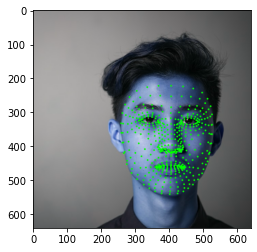

In [87]:
# choosing random image from the testing data
faceModule = mp.solutions.face_mesh
with faceModule.FaceMesh(static_image_mode=True) as face:
    # reading the image
    frame = cv2.imread('test.jpg')
    # processing the image to detect the face and then generating the land marks (468 for each x,y,z).
    results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None:
        for face in results.multi_face_landmarks:
            for j,landmark in enumerate(face.landmark):
                x = landmark.x
                y = landmark.y
                
                shape = frame.shape 
                
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                
                cv2.circle(frame, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
        plt.imshow(frame)

In [88]:
faceModule = mediapipe.solutions.face_mesh
with faceModule.FaceMesh(static_image_mode=True) as face:
    frame = cv2.imread('test.jpg')
    results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None:
        for face in results.multi_face_landmarks:
            # initializing two lists to store x and y points
            X = []
            Y = []
            for j,landmark in enumerate(face.landmark):
                x = landmark.x
                y = landmark.y
                shape = frame.shape 
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                X.append(relative_x)
                Y.append(relative_y)

            X = pd.DataFrame(X).T
            Y = pd.DataFrame(Y).T

            y_cord_features = Y
            x_cord_features = X
            
            point_to_center_x = 2
            point_to_center_y = 3
            
            centered_x_features = x_cord_features.sub(x_cord_features.iloc\
                                          [:, int(point_to_center_x)], axis='rows')

            centered_y_features = y_cord_features.sub(y_cord_features.iloc\
                                                  [:, int(point_to_center_y)], axis='rows')



            # Divide distances 1
            centered_x_features = centered_x_features.sub(centered_x_features.min(axis=1),\
                                                          axis=0)

            centered_x_features = centered_x_features.div( (centered_x_features.max(axis=1)\
                                                            -centered_x_features.min(axis=1))\
                                                          ,axis=0)

            centered_y_features = centered_y_features.sub(centered_y_features.min(axis=1),axis=0)

            centered_y_features = centered_y_features.div( (centered_y_features.max(axis=1)\
                                                            -centered_y_features.min(axis=1)) ,axis=0)



            scaled_data = pd.concat([centered_x_features, centered_y_features], axis=1)


            points = np.array(scaled_data)
            
            pred_pitch = pitch_model.predict(points) * -1
            pred_yaw = yaw_model.predict(points)
            pred_roll = roll_model.predict(points) 
            
            img = draw_axis(frame, pred_pitch, pred_yaw, pred_roll, X.iloc[:, int(point_to_center_x)][0], Y.iloc[:, int(point_to_center_y)][0])
            cv2.imwrite('outimg.jpg', img)


In [89]:
cap = cv2.VideoCapture('screen.mp4')
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

if (cap.isOpened()== False): 
    print("Error!!!")

img_array = []

while(cap.isOpened()):   

    ret, frame = cap.read()
    if ret == True:
        with faceModule.FaceMesh(static_image_mode=True) as face:

            results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            if results.multi_face_landmarks != None:
                for face in results.multi_face_landmarks:

                    X = []
                    Y = []
                    # looping over the landmarks to extract x and y
                    for j,landmark in enumerate(face.landmark):
                        x = landmark.x
                        y = landmark.y
                        # retrieve the true values of x and y
                        shape = frame.shape 
                        relative_x = int(x * shape[1])
                        relative_y = int(y * shape[0])
                        X.append(relative_x)
                        Y.append(relative_y)
                
                # converting the x and y points to numpy array
                X = pd.DataFrame(X).T
                Y = pd.DataFrame(Y).T

                y_cord_features = Y
                x_cord_features = X

                point_to_center_x = 2
                point_to_center_y = 3

                centered_x_features = x_cord_features.sub(x_cord_features.iloc\
                                              [:, int(point_to_center_x)], axis='rows')

                centered_y_features = y_cord_features.sub(y_cord_features.iloc\
                                                      [:, int(point_to_center_y)], axis='rows')



                # Divide distances 1
                centered_x_features = centered_x_features.sub(centered_x_features.min(axis=1),\
                                                              axis=0)

                centered_x_features = centered_x_features.div( (centered_x_features.max(axis=1)\
                                                                -centered_x_features.min(axis=1))\
                                                              ,axis=0)

                centered_y_features = centered_y_features.sub(centered_y_features.min(axis=1),axis=0)

                centered_y_features = centered_y_features.div( (centered_y_features.max(axis=1)\
                                                                -centered_y_features.min(axis=1)) ,axis=0)



                scaled_data = pd.concat([centered_x_features, centered_y_features], axis=1)


                # concatinating the x and y points to predict the labels (pitch,yaw,roll)
                points = np.array(scaled_data)

                pred_pitch = pitch_model.predict(points)
                pred_yaw = yaw_model.predict(points)
                pred_roll = roll_model.predict(points)
                draw_axis(frame,pred_pitch,pred_yaw,pred_roll, X.iloc[:, int(point_to_center_x)][0], Y.iloc[:, int(point_to_center_y)][0])
                img_array.append(frame)

    else: 
        break

cap.release()  
cv2.destroyAllWindows()

In [90]:
print(X.iloc[:, int(point_to_center_x)][0])

739


In [91]:
print(Y.iloc[:, int(point_to_center_y)][0])

462


In [92]:
out = cv2.VideoWriter('outpy3.avi',cv2.VideoWriter_fourcc(*'MJPG'), 15, (width,height))
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()